In [927]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Load Data

In [928]:
!wget "https://raw.githubusercontent.com/fredysunjaya2/Liver-Disease/main/Liver%20Patient%20Dataset%20(LPD)_train.csv"

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [1009]:
data = pd.read_csv("Liver Patient Dataset (LPD)_train.csv", encoding='unicode_escape')

In [930]:
data

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


# Data Visualization

In [931]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [932]:
data.isnull().any()

Age of the patient                       True
Gender of the patient                    True
Total Bilirubin                          True
Direct Bilirubin                         True
 Alkphos Alkaline Phosphotase            True
 Sgpt Alamine Aminotransferase           True
Sgot Aspartate Aminotransferase          True
Total Protiens                           True
 ALB Albumin                             True
A/G Ratio Albumin and Globulin Ratio     True
Result                                  False
dtype: bool

In [933]:
data.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [934]:
countDuplicate = 0

for i in data.duplicated():
    if i:
        countDuplicate += 1
        print('.', end='')
        
print()
print("Total Duplicated: ", countDuplicate)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [935]:
countData = len(data)

for column in data.columns:
    print(f"{column} ( {((len(data[column].unique()) / countData) * 100):.3f}% )")

Age of the patient ( 0.254% )
Gender of the patient ( 0.010% )
Total Bilirubin ( 0.371% )
Direct Bilirubin ( 0.264% )
 Alkphos Alkaline Phosphotase ( 0.860% )
 Sgpt Alamine Aminotransferase ( 0.499% )
Sgot Aspartate Aminotransferase ( 0.580% )
Total Protiens ( 0.192% )
 ALB Albumin ( 0.134% )
A/G Ratio Albumin and Globulin Ratio ( 0.228% )
Result ( 0.007% )


In [936]:
data.nunique()

Age of the patient                       77
Gender of the patient                     2
Total Bilirubin                         113
Direct Bilirubin                         80
 Alkphos Alkaline Phosphotase           263
 Sgpt Alamine Aminotransferase          152
Sgot Aspartate Aminotransferase         177
Total Protiens                           58
 ALB Albumin                             40
A/G Ratio Albumin and Globulin Ratio     69
Result                                    2
dtype: int64

Class Distribution where :

1 shows Liver Disease Detected

2 shows Non Liver Disease Detected

In [937]:
class_counts = data['Result'].value_counts()
print(class_counts)

Result
1    21917
2     8774
Name: count, dtype: int64


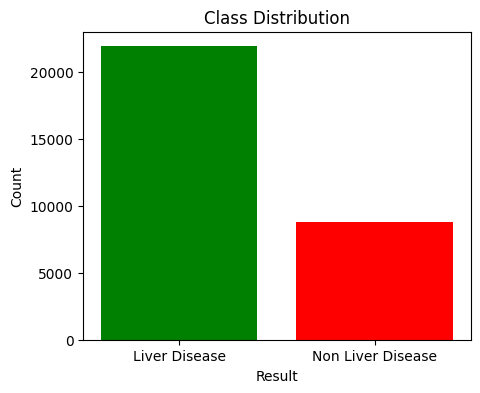

In [938]:
# Plotting the Number of patients with liver disease vs Number of patients with no liver disease
saved = plt.figure(figsize=(5,4))
colors = ['green', 'red']

plt.bar(['Liver Disease', 'Non Liver Disease'], class_counts.values, color=colors)
plt.xlabel("Result")
plt.ylabel("Count")
plt.title('Class Distribution')

plt.show()

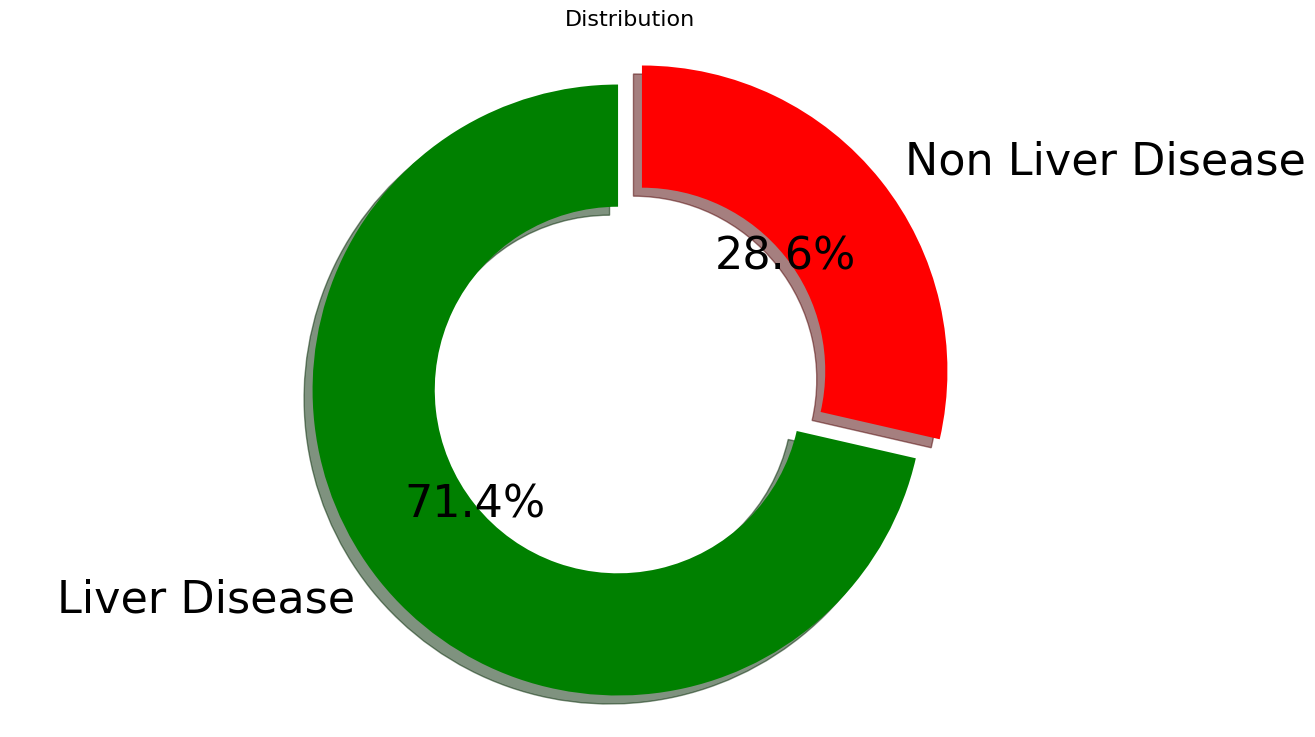

In [939]:
colors = ['green', 'red']
explode = (0, 0.1)
plt.pie(data['Result'].value_counts(), labels = ["Liver Disease", "Non Liver Disease"], autopct = '%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors, explode=explode, shadow=True, textprops={'fontsize': 32})
fig = plt.gcf()

plt.axis('equal')
plt.title('Distribution', fontsize=16)

plt.show()

array([[<Axes: title={'center': 'Age of the patient'}>,
        <Axes: title={'center': 'Total Bilirubin'}>,
        <Axes: title={'center': 'Direct Bilirubin'}>],
       [<Axes: title={'center': '\xa0Alkphos Alkaline Phosphotase'}>,
        <Axes: title={'center': '\xa0Sgpt Alamine Aminotransferase'}>,
        <Axes: title={'center': 'Sgot Aspartate Aminotransferase'}>],
       [<Axes: title={'center': 'Total Protiens'}>,
        <Axes: title={'center': '\xa0ALB Albumin'}>,
        <Axes: title={'center': 'A/G Ratio Albumin and Globulin Ratio'}>],
       [<Axes: title={'center': 'Result'}>, <Axes: >, <Axes: >]],
      dtype=object)

<Figure size 1500x1200 with 0 Axes>

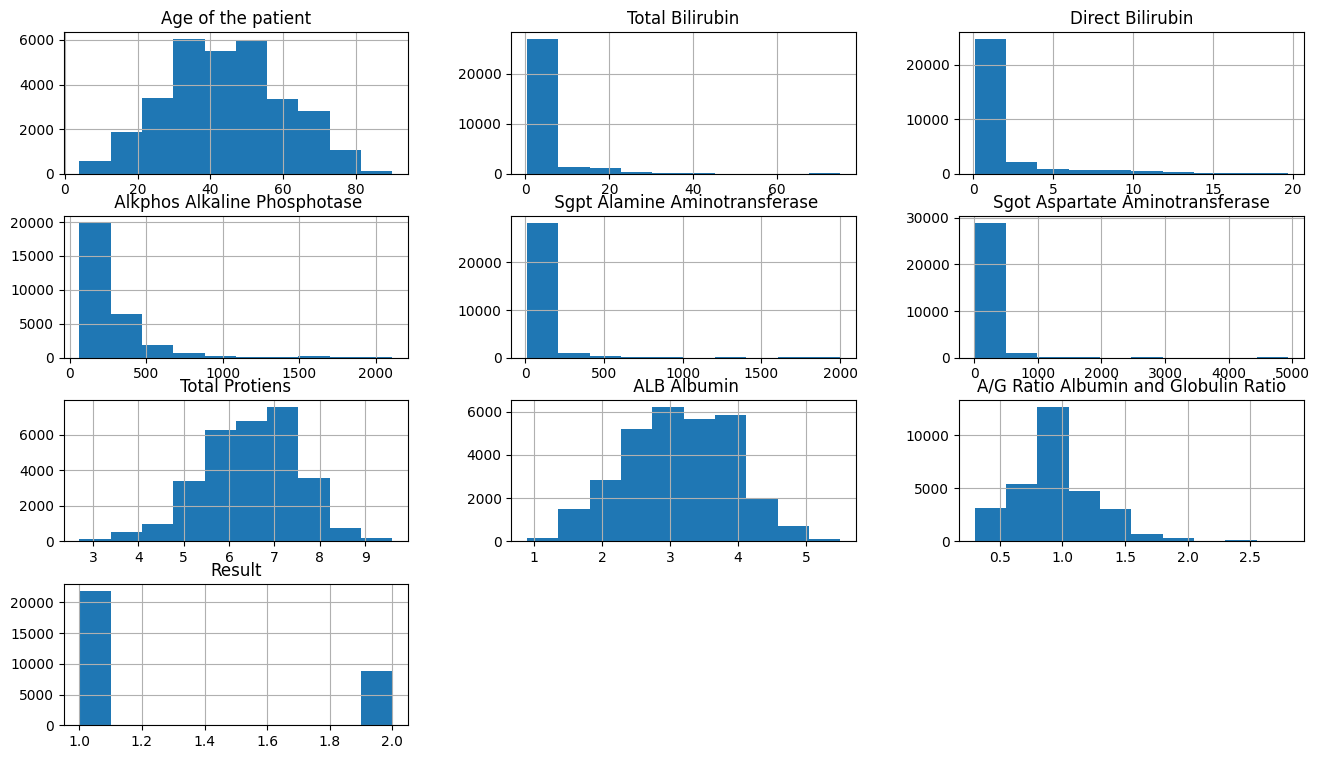

In [940]:
plt.figure(figsize=(15, 12))

data.hist()

c:\Users\bcamaster\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


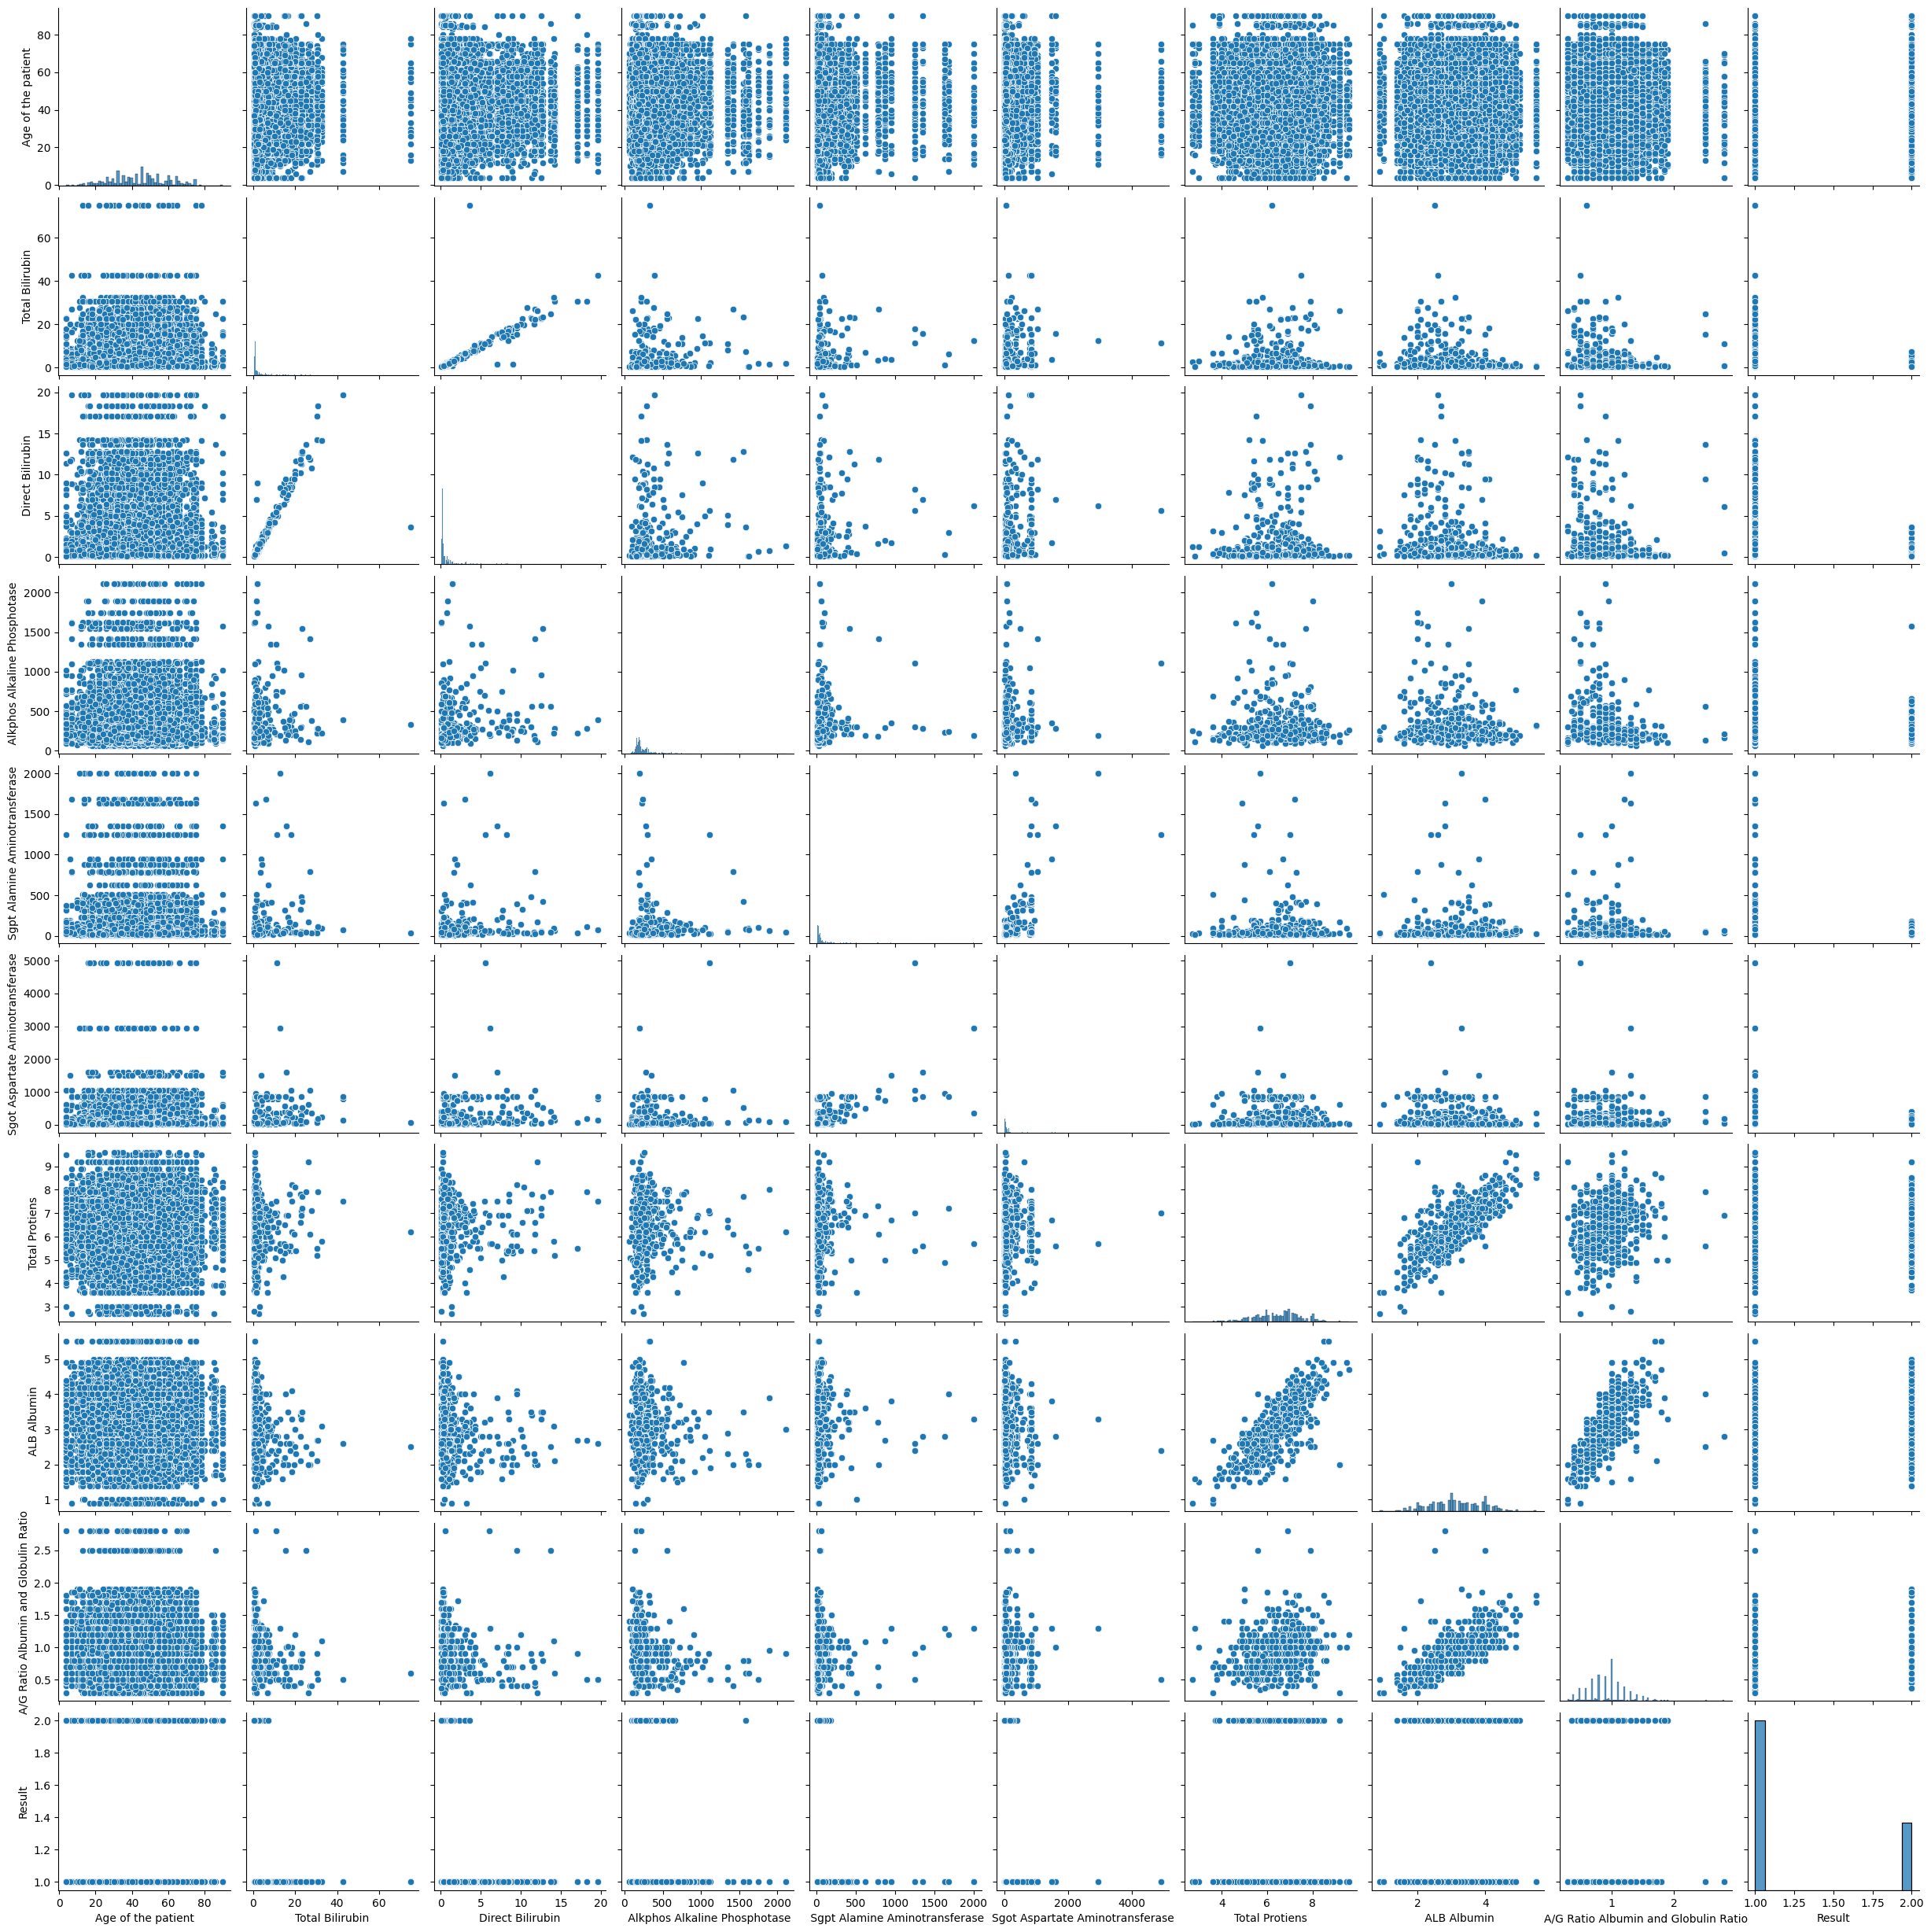

In [941]:
sb.pairplot(data);
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [942]:
data.columns.tolist()

['Age of the patient',
 'Gender of the patient',
 'Total Bilirubin',
 'Direct Bilirubin',
 '\xa0Alkphos Alkaline Phosphotase',
 '\xa0Sgpt Alamine Aminotransferase',
 'Sgot Aspartate Aminotransferase',
 'Total Protiens',
 '\xa0ALB Albumin',
 'A/G Ratio Albumin and Globulin Ratio',
 'Result']

<Axes: >

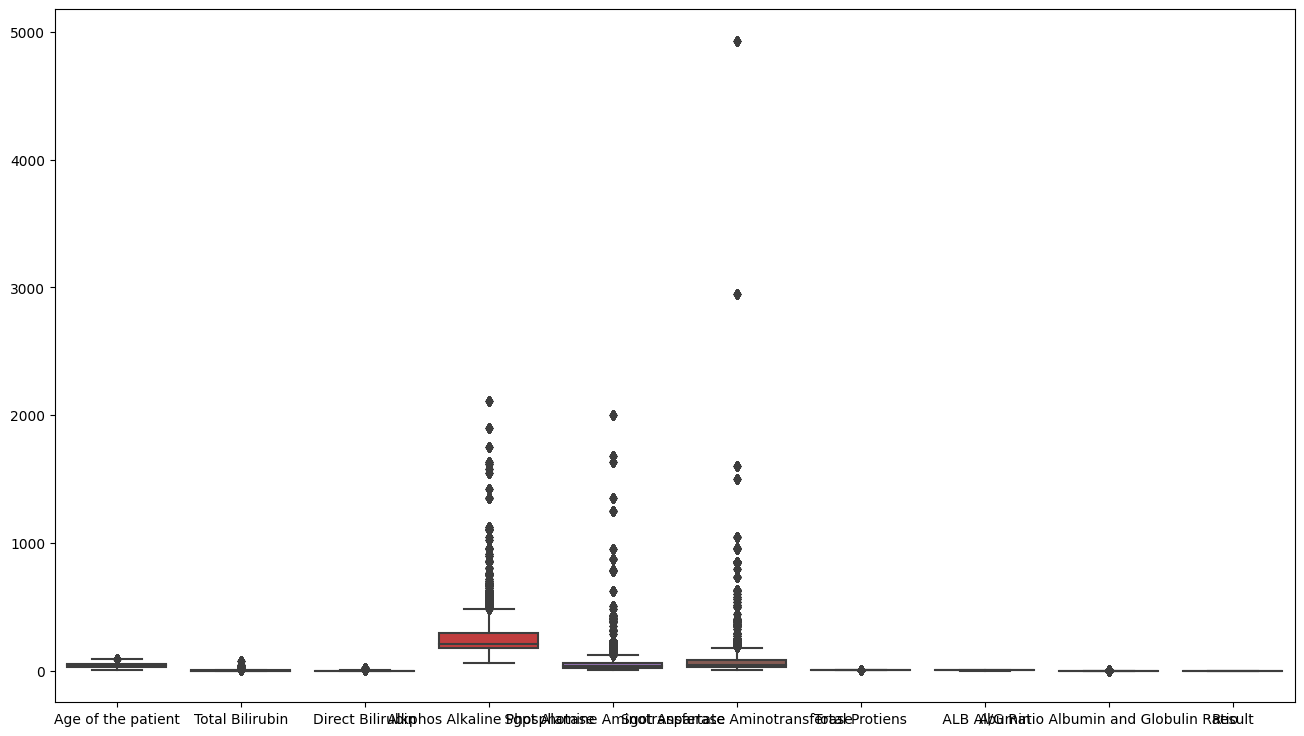

In [943]:
sb.boxplot(data = data)

# Data Preprocessing

In [1010]:
data.loc[data["Result"] == 1, "Result"] = 0
data.loc[data["Result"] == 2,"Result"]= 1

In [1011]:
data = data.drop_duplicates()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19368 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    19367 non-null  float64
 1   Gender of the patient                 18572 non-null  object 
 2   Total Bilirubin                       18811 non-null  float64
 3   Direct Bilirubin                      18878 non-null  float64
 4    Alkphos Alkaline Phosphotase         18674 non-null  float64
 5    Sgpt Alamine Aminotransferase        18909 non-null  float64
 6   Sgot Aspartate Aminotransferase       18975 non-null  float64
 7   Total Protiens                        18998 non-null  float64
 8    ALB Albumin                          18955 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  18932 non-null  float64
 10  Result                                19368 non-null  int64  
dtypes: float64(9), int64

In [1013]:
data_numerik = data.select_dtypes(exclude=object)
data_kategorik = data.select_dtypes(include=object)

In [1014]:
# Fill data
for i in data:
  if i in data_numerik :
    data[i] = data[i].fillna(data[i].mean())
  elif i in data_kategorik :
    data[i] = data[i].fillna(data[i].mode()[0])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19368 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    19368 non-null  float64
 1   Gender of the patient                 19368 non-null  object 
 2   Total Bilirubin                       19368 non-null  float64
 3   Direct Bilirubin                      19368 non-null  float64
 4    Alkphos Alkaline Phosphotase         19368 non-null  float64
 5    Sgpt Alamine Aminotransferase        19368 non-null  float64
 6   Sgot Aspartate Aminotransferase       19368 non-null  float64
 7   Total Protiens                        19368 non-null  float64
 8    ALB Albumin                          19368 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  19368 non-null  float64
 10  Result                                19368 non-null  int64  
dtypes: float64(9), int64

In [1015]:
# HANDLING DATA KATEGORIK
encode = LabelEncoder()

for i in data_kategorik :
  data[i] = encode.fit_transform(data[i])

data.dtypes

Age of the patient                      float64
Gender of the patient                     int32
Total Bilirubin                         float64
Direct Bilirubin                        float64
 Alkphos Alkaline Phosphotase           float64
 Sgpt Alamine Aminotransferase          float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
 ALB Albumin                            float64
A/G Ratio Albumin and Globulin Ratio    float64
Result                                    int64
dtype: object

In [1017]:
# save skewed features
skewed_cols = ['A/G Ratio Albumin and Globulin Ratio', 'Total Bilirubin', 'Direct Bilirubin', '\xa0Alkphos Alkaline Phosphotase', '\xa0Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase']

# Apply log1p transformation on dataframe - just selected values
for c in skewed_cols:
    data[c] = data[c].apply('log1p')

array([[<Axes: title={'center': 'Age of the patient'}>,
        <Axes: title={'center': 'Gender of the patient'}>,
        <Axes: title={'center': 'Total Bilirubin'}>],
       [<Axes: title={'center': 'Direct Bilirubin'}>,
        <Axes: title={'center': '\xa0Alkphos Alkaline Phosphotase'}>,
        <Axes: title={'center': '\xa0Sgpt Alamine Aminotransferase'}>],
       [<Axes: title={'center': 'Sgot Aspartate Aminotransferase'}>,
        <Axes: title={'center': 'Total Protiens'}>,
        <Axes: title={'center': '\xa0ALB Albumin'}>],
       [<Axes: title={'center': 'A/G Ratio Albumin and Globulin Ratio'}>,
        <Axes: title={'center': 'Result'}>, <Axes: >]], dtype=object)

<Figure size 1500x1200 with 0 Axes>

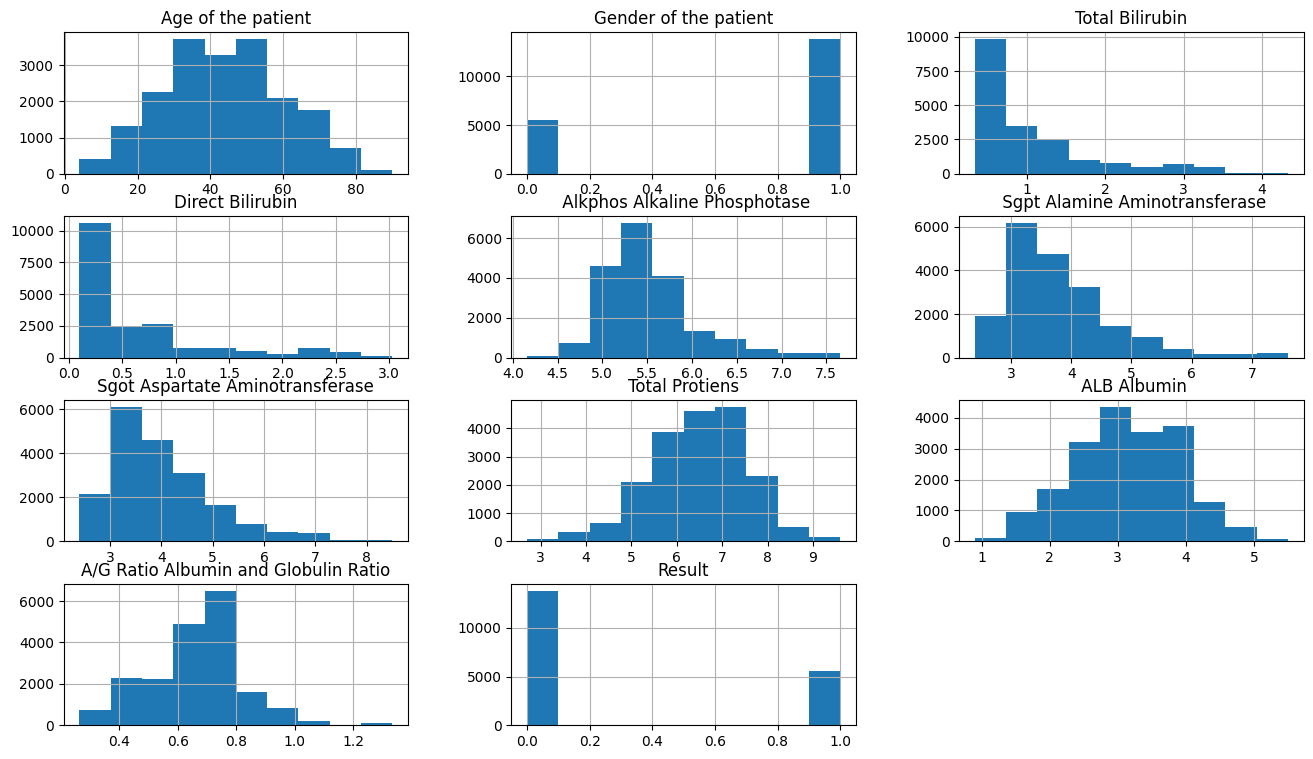

In [1018]:
plt.figure(figsize=(15, 12))

data.hist()

In [1019]:
for col in data.columns:
  if col in data_numerik:
    q3 = data[col].quantile(0.75)
    q1 = data[col].quantile(0.25)
    iqr = q3 - q1
    upperLimit = q3 + 1.5 * iqr
    lowerLimit = q1 - 1.5 * iqr

    data = data.loc[(data[col] <= upperLimit) & (data[col] >= lowerLimit)]

In [1020]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14075 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    14075 non-null  float64
 1   Gender of the patient                 14075 non-null  int32  
 2   Total Bilirubin                       14075 non-null  float64
 3   Direct Bilirubin                      14075 non-null  float64
 4    Alkphos Alkaline Phosphotase         14075 non-null  float64
 5    Sgpt Alamine Aminotransferase        14075 non-null  float64
 6   Sgot Aspartate Aminotransferase       14075 non-null  float64
 7   Total Protiens                        14075 non-null  float64
 8    ALB Albumin                          14075 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  14075 non-null  float64
 10  Result                                14075 non-null  int64  
dtypes: float64(9), int32

In [1021]:
from sklearn.compose import ColumnTransformer

column_scaled = data.drop("Result", axis=1).columns.tolist()

ct = ColumnTransformer([
        ('scaled', StandardScaler(), column_scaled)
    ], remainder='passthrough')

# data_to_scale
data[column_scaled] = ct.fit_transform(data[column_scaled])

In [1024]:
data.describe()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,1.407500e+04,1.407500e+04,1.407500e+04,1.407500e+04,1.407500e+04,1.407500e+04,1.407500e+04,1.407500e+04,1.407500e+04,1.407500e+04,14075.000000
mean,-6.537498e-17,4.038609e-18,2.927991e-17,-5.553087e-17,-1.055087e-15,-4.391987e-17,8.481078e-17,-2.054642e-16,1.186341e-16,-2.418117e-16,0.356163
std,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,1.000036e+00,0.478881
min,-2.433193e+00,-1.585396e+00,-1.295107e+00,-9.030074e-01,-2.429866e+00,-1.908071e+00,-1.940298e+00,-2.613906e+00,-2.667514e+00,-2.426969e+00,0.000000
25%,-7.189447e-01,-1.585396e+00,-7.518323e-01,-6.237165e-01,-6.468988e-01,-7.001151e-01,-7.712583e-01,-6.833776e-01,-6.609802e-01,-6.730601e-01,0.000000
50%,7.695630e-02,6.307573e-01,-4.406080e-01,-6.237165e-01,-2.385407e-01,-1.592826e-01,-2.058962e-01,2.786994e-02,-8.768475e-02,1.815791e-01,0.000000
75%,6.891878e-01,6.307573e-01,5.426508e-01,4.942852e-01,6.775282e-01,6.040264e-01,5.765861e-01,6.375106e-01,9.155823e-01,5.773440e-01,1.000000
max,2.587105e+00,6.307573e-01,4.316087e+00,3.472956e+00,2.953135e+00,2.890320e+00,2.746236e+00,2.364826e+00,2.492145e+00,2.309765e+00,1.000000


# Feature Selection

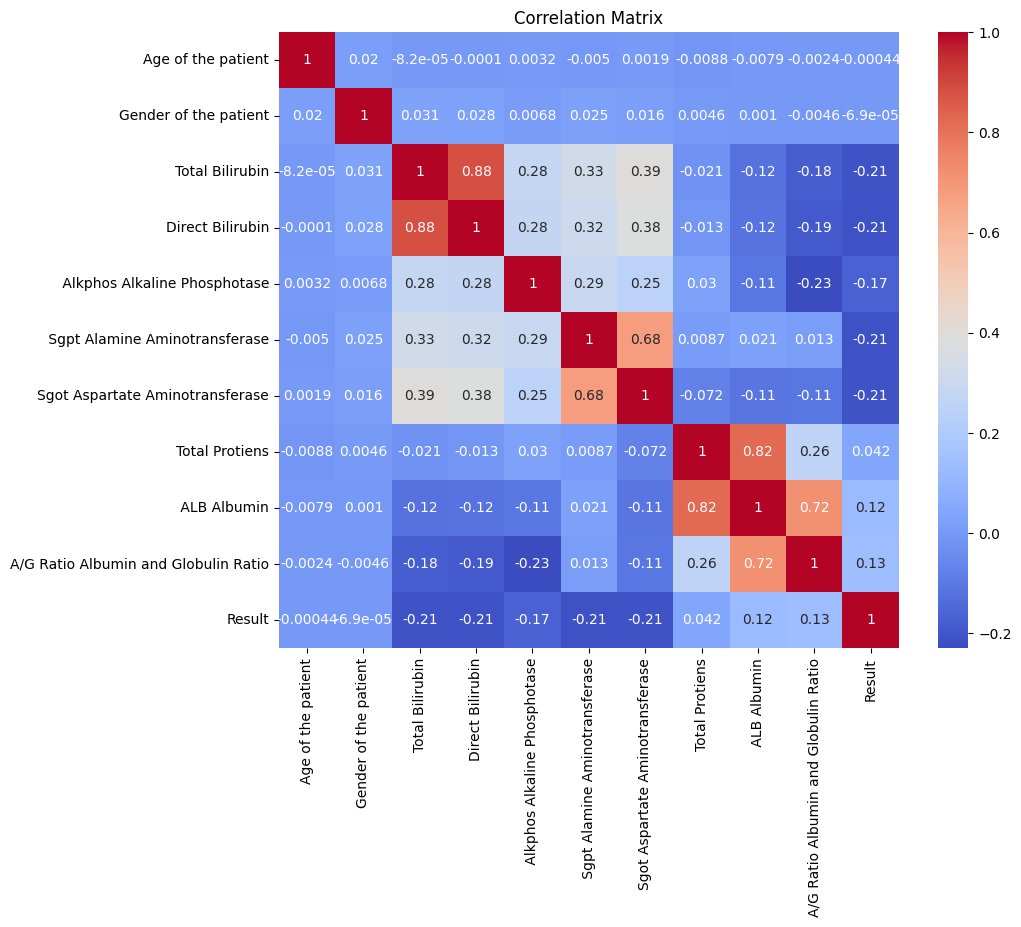

In [1025]:
# CORRELATION MATRIX
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [954]:
abs_corr = abs(corr_matrix['Result'])
high_corr = abs_corr[abs_corr >= 0.15]
chosen_features = [col for col in data.columns if col in high_corr]

chosen_features

['Total Bilirubin',
 'Direct Bilirubin',
 '\xa0Alkphos Alkaline Phosphotase',
 '\xa0Sgpt Alamine Aminotransferase',
 'Sgot Aspartate Aminotransferase',
 'Result']

In [955]:
X = data[chosen_features]
Y = data['Result']
X = X.drop("Result", axis=1)

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
# bb_Y_train = Y_train

# TRAINING MODEL

In [956]:
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

1. SVM

In [957]:
nSVM = 4

parameters5 = {'svm__kernel': ["linear", "poly", "rbf", "sigmoid"]}
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['svm', SVC()]])

stratified_kfold5 = StratifiedKFold(n_splits=nSVM,
                                       shuffle=True,
                                       random_state=42)

clf5 = GridSearchCV(estimator=pipeline,
                           param_grid=parameters5,
                           scoring='roc_auc',
                           cv=stratified_kfold5,
                           n_jobs=-1)

# Perform grid search
clf5.fit(X_train, Y_train)

print("Best Parameters:", clf5.best_params_)
print("Best Score:", clf5.best_score_)
currentSVM = clf5.best_estimator_

Best Parameters: {'svm__kernel': 'rbf'}
Best Score: 0.7994717113330945


In [958]:
svm_score = currentSVM.score(X_train, Y_train) * 100
svm_score_test = currentSVM.score(X_test, Y_test) * 100

print('SVM Score: \n', svm_score)
print('SVM Test Score: \n', svm_score_test)

SVM Score: 
 69.10301953818828
SVM Test Score: 
 68.3126110124334


2. Decision Tree

In [959]:
nDT = 4
DTs = 40

parameters = {'tree__max_depth': np.delete(np.arange(DTs), 0)}
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['tree', DecisionTreeClassifier()]])

stratified_kfold = StratifiedKFold(n_splits=nDT,
                                       shuffle=True,
                                       random_state=42)

clf = GridSearchCV(estimator=pipeline,
                           param_grid=parameters,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

# Perform grid search
clf.fit(X_train, Y_train)

print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)
currentDT = clf.best_estimator_

Best Parameters: {'tree__max_depth': 23}
Best Score: 0.9795469055520822


In [960]:
decision_tree_score = currentDT.score(X_train, Y_train) * 100
decision_tree_score_test = currentDT.score(X_test, Y_test) * 100

print('Decision Tree Score: \n', decision_tree_score)
print('Decision Tree Test Score: \n', decision_tree_score_test)

Decision Tree Score: 
 99.95559502664298
Decision Tree Test Score: 
 98.36589698046181


3. Logistic Regression

In [961]:
nLR = 4

parameters4 = {'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
pipeline4 = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['lr', LogisticRegression()]])

stratified_kfold4 = StratifiedKFold(n_splits=nLR,
                                       shuffle=True,
                                       random_state=42)

clf4 = GridSearchCV(estimator=pipeline4,
                           param_grid=parameters4,
                           scoring='roc_auc',
                           cv=stratified_kfold4,
                           n_jobs=-1)

# Perform grid search
clf4.fit(X_train, Y_train)

print("Best Parameters:", clf4.best_params_)
print("Best Score:", clf4.best_score_)
currentLR = clf4.best_estimator_

Best Parameters: {'lr__C': 0.001}
Best Score: 0.6632661268850418


In [962]:
logistic_regression_score = currentLR.score(X_train, Y_train) * 100
logistic_regression_score_test = currentLR.score(X_test, Y_test) * 100

print('Logistic Regression Score: \n', logistic_regression_score)
print('Logistic Regression Test Score: \n', logistic_regression_score_test)

Logistic Regression Score: 
 59.795737122557725
Logistic Regression Test Score: 
 59.715808170515096


4. KNN

In [963]:
nKNN = 4
KNNs = 40

parameters3 = {'knn__n_neighbors': np.delete(np.arange(KNNs), 0)}
pipeline3 = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['knn', KNeighborsClassifier()]])

stratified_kfold3 = StratifiedKFold(n_splits=nKNN,
                                       shuffle=True,
                                       random_state=42)

clf3 = GridSearchCV(estimator=pipeline3,
                           param_grid=parameters3,
                           scoring='roc_auc',
                           cv=stratified_kfold3,
                           n_jobs=-1)

# Perform grid search
clf3.fit(X_train, Y_train)

print("Best Parameters:", clf3.best_params_)
print("Best Score:", clf3.best_score_)
currentKNN = clf3.best_estimator_

Best Parameters: {'knn__n_neighbors': 14}
Best Score: 0.9939495299166659


In [964]:
knn_score = currentKNN.score(X_train, Y_train) * 100
knn_score_test = currentKNN.score(X_test, Y_test) * 100

print('KNN Score: \n', knn_score)
print('KNN Test Score: \n', knn_score_test)

KNN Score: 
 97.24689165186501
KNN Test Score: 
 96.48312611012433


5. Random Forest

In [965]:
nRF = 4
RFs = 40

parameters2 = {'forest__max_depth': np.delete(np.arange(RFs), 0)}

pipeline2 = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['forest', RandomForestClassifier()]])

stratified_kfold2 = StratifiedKFold(n_splits=nRF,
                                       shuffle=True,
                                       random_state=42)

clf2 = GridSearchCV(estimator=pipeline2,
                           param_grid=parameters2,
                           scoring='roc_auc',
                           cv=stratified_kfold2,
                           n_jobs=-1)

# Perform grid search
clf2.fit(X_train, Y_train)

print("Best Parameters:", clf2.best_params_)
print("Best Score:", clf2.best_score_)
currentRF = clf2.best_estimator_

Best Parameters: {'forest__max_depth': 35}
Best Score: 0.9989967609442437


In [966]:
random_forest_score = currentRF.score(X_train, Y_train) * 100
random_forest_score_test = currentRF.score(X_test, Y_test) * 100

print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)

Random Forest Score: 
 99.95559502664298
Random Forest Test Score: 
 98.72113676731794


6. XGBoost

In [967]:
nXGB = 4
XGBs = 40

parameters6 = {'XGB__max_depth': np.delete(np.arange(XGBs), 0)}

pipeline6 = imbpipeline(steps = [['smote', SMOTE(random_state=42)],
                                ['XGB', XGBClassifier()]])

stratified_kfold6 = StratifiedKFold(n_splits=nXGB,
                                       shuffle=True,
                                       random_state=42)

clf6 = GridSearchCV(estimator=pipeline6,
                           param_grid=parameters6,
                           scoring='roc_auc',
                           cv=stratified_kfold6,
                           n_jobs=-1)

# Perform grid search
clf6.fit(X_train, Y_train)

print("Best Parameters:", clf6.best_params_)
print("Best Score:", clf6.best_score_)
currentXGB = clf6.best_estimator_

Best Parameters: {'XGB__max_depth': 11}
Best Score: 0.9986916252491831


In [968]:
XGBoost_Score = currentXGB.score(X_train, Y_train) * 100
XGBoost_Score_test = currentXGB.score(X_test, Y_test) * 100

print('XGBoost Score: \n', XGBoost_Score)
print('XGBoost Test Score: \n', XGBoost_Score_test)

XGBoost Score: 
 99.95559502664298
XGBoost Test Score: 
 99.07637655417408


# EVALUATE MODEL

In [969]:
from sklearn.metrics import accuracy_score

svm_predictions = currentSVM.predict(X_test)
svm_accuracy = accuracy_score(Y_test, svm_predictions)

decision_tree_predictions = currentDT.predict(X_test)
decision_tree_accuracy = accuracy_score(Y_test, decision_tree_predictions)

logistic_regression_predictions = currentLR.predict(X_test)
logistic_regression_accuracy = accuracy_score(Y_test, logistic_regression_predictions)

knn_predictions = currentKNN.predict(X_test)
knn_accuracy = accuracy_score(Y_test, knn_predictions)

random_forest_predictions = currentRF.predict(X_test)
random_forest_accuracy = accuracy_score(Y_test, random_forest_predictions)

XGBoost_predictions = currentXGB.predict(X_test)
XGBoost_accuracy = accuracy_score(Y_test, XGBoost_predictions)

In [970]:
print("SVM Accuracy:", svm_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", random_forest_accuracy)
print("XGBoost Accuracy:", XGBoost_accuracy)

SVM Accuracy: 0.6831261101243339
Decision Tree Accuracy: 0.9836589698046181
Logistic Regression Accuracy: 0.597158081705151
K-Nearest Neighbors Accuracy: 0.9648312611012433
Random Forest Accuracy: 0.9872113676731794
XGBoost Accuracy: 0.9907637655417407


# Evaluation

In [971]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, mean_absolute_error, mean_squared_error

1. SVM

<Axes: >

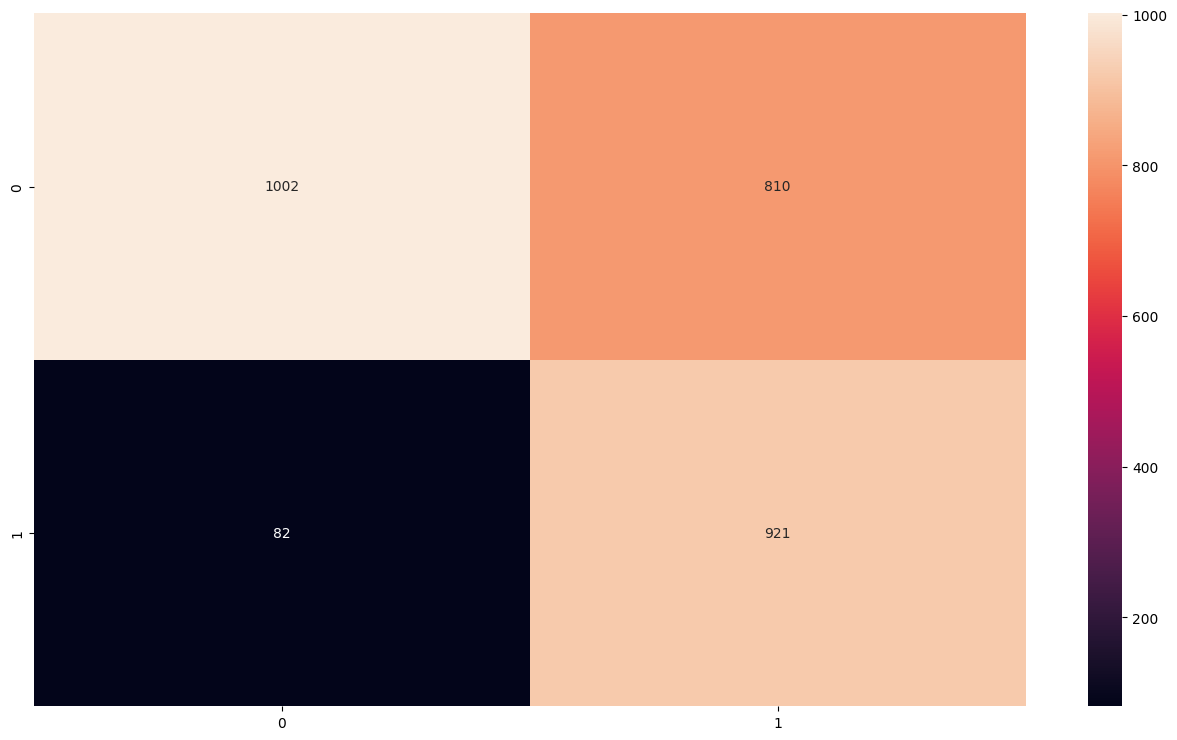

In [972]:
cm = confusion_matrix(Y_test, svm_predictions)
sb.heatmap(cm, annot = True, fmt = "g")

In [973]:
f1 = f1_score(Y_test, svm_predictions)
recall = recall_score(Y_test, svm_predictions)
precision = precision_score(Y_test, svm_predictions)
mae = mean_absolute_error(Y_test, svm_predictions)
rmse = mean_squared_error(Y_test, svm_predictions, squared=False)

In [974]:
print("F1 Score : ", f1)
print("Recall : ", recall)
print("Precision : ", precision)
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", rmse)

F1 Score :  0.6737381126554498
Recall :  0.9182452642073778
Precision :  0.5320623916811091
Mean Absolute Error :  0.31687388987566606
Mean Squared Error :  0.5629155264119707


2. Decision Tree

<Axes: >

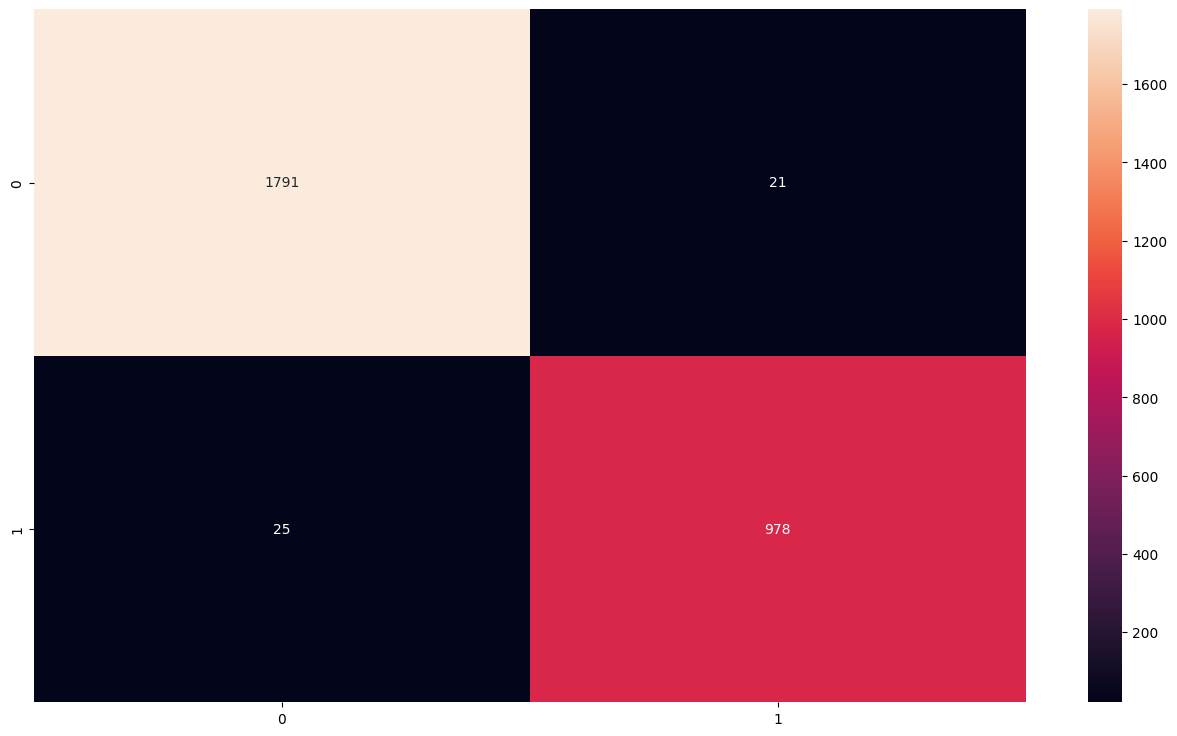

In [975]:
cm = confusion_matrix(Y_test, decision_tree_predictions)
sb.heatmap(cm, annot = True, fmt = "g")

In [976]:
f1 = f1_score(Y_test, decision_tree_predictions)
recall = recall_score(Y_test, decision_tree_predictions)
precision = precision_score(Y_test, decision_tree_predictions)
mae = mean_absolute_error(Y_test, decision_tree_predictions)
rmse = mean_squared_error(Y_test, decision_tree_predictions, squared=False)

In [977]:
print("F1 Score : ", f1)
print("Recall : ", recall)
print("Precision : ", precision)
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", rmse)

F1 Score :  0.977022977022977
Recall :  0.9750747756729811
Precision :  0.978978978978979
Mean Absolute Error :  0.016341030195381884
Mean Squared Error :  0.12783203900189452


3. Logistic Regression

<Axes: >

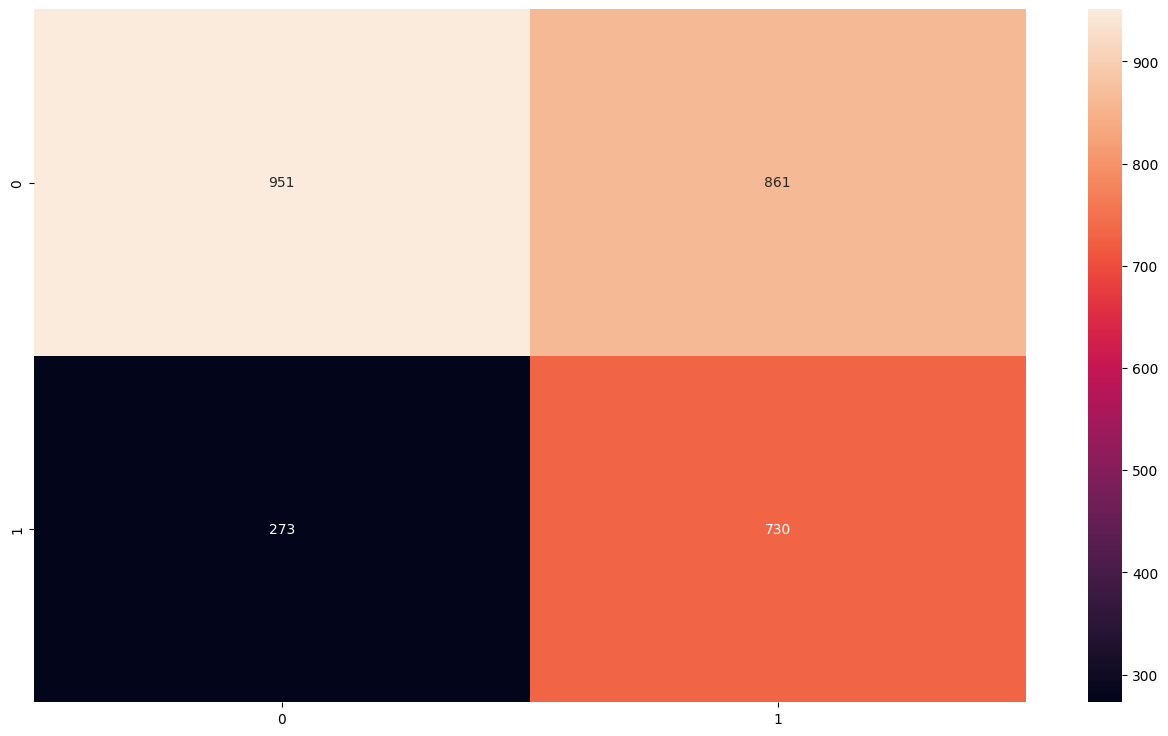

In [978]:
cm = confusion_matrix(Y_test, logistic_regression_predictions)
sb.heatmap(cm, annot = True, fmt = "g")

In [979]:
f1 = f1_score(Y_test, logistic_regression_predictions)
recall = recall_score(Y_test, logistic_regression_predictions)
precision = precision_score(Y_test, logistic_regression_predictions)
mae = mean_absolute_error(Y_test, logistic_regression_predictions)
rmse = mean_squared_error(Y_test, logistic_regression_predictions, squared=False)

In [980]:
print("F1 Score : ", f1)
print("Recall : ", recall)
print("Precision : ", precision)
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", rmse)

F1 Score :  0.5628373168851195
Recall :  0.7278165503489531
Precision :  0.45883092394720304
Mean Absolute Error :  0.402841918294849
Mean Squared Error :  0.6346982891853806


In [981]:
classifier=LogisticRegression(solver='liblinear')
classifier.fit(X_train,Y_train)
y_test_prediction=classifier.predict(X_test)
y_test_prediction

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [982]:
comparison=pd.DataFrame({'Actual':Y_test,'Predicted':y_test_prediction})
comparison[0:10]

,Actual,Predicted
9620,0,0
8169,0,1
26928,0,0
25178,0,0
17014,1,0
25942,1,0
6195,1,0
21312,0,0
8161,1,0
8219,1,0


4. KNN

<Axes: >

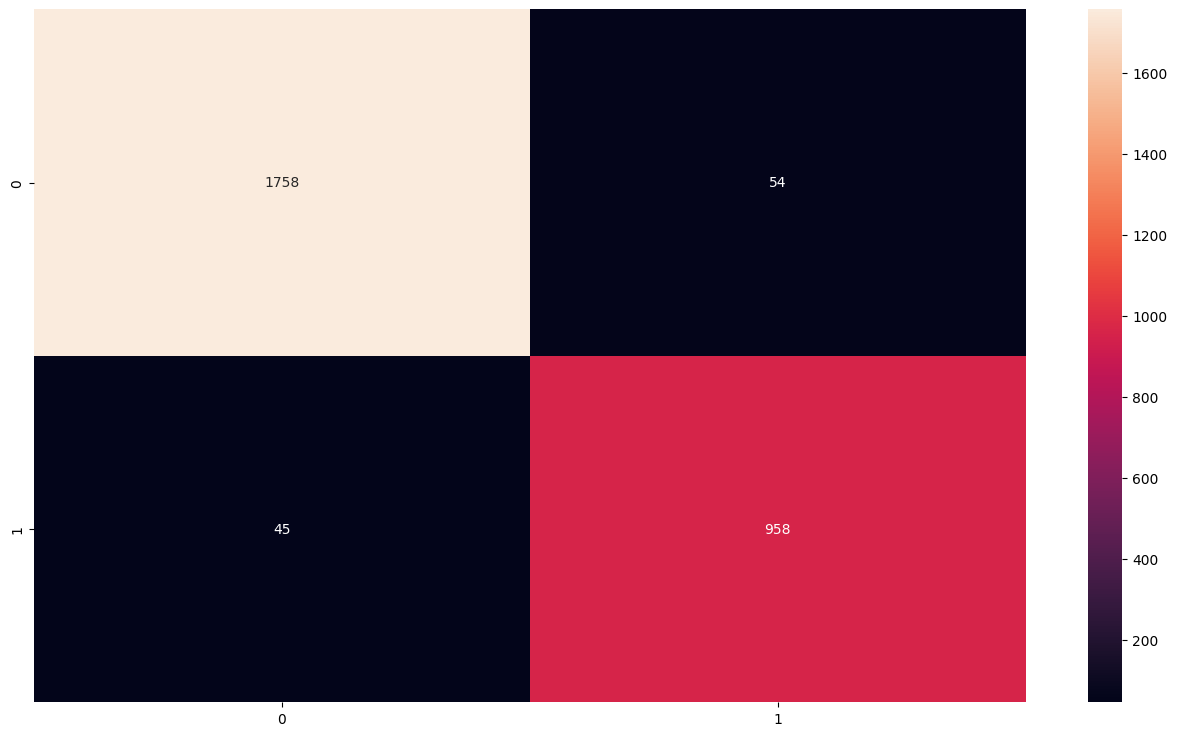

In [983]:
cm = confusion_matrix(Y_test, knn_predictions)
sb.heatmap(cm, annot = True, fmt = "g")

In [984]:
f1 = f1_score(Y_test, knn_predictions)
recall = recall_score(Y_test, knn_predictions)
precision = precision_score(Y_test, knn_predictions)
mae = mean_absolute_error(Y_test, knn_predictions)
rmse = mean_squared_error(Y_test, knn_predictions, squared=False)

In [985]:
print("F1 Score : ", f1)
print("Recall : ", recall)
print("Precision : ", precision)
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", rmse)

F1 Score :  0.9508684863523572
Recall :  0.9551345962113659
Precision :  0.9466403162055336
Mean Absolute Error :  0.03516873889875666
Mean Squared Error :  0.1875333007728405


5. Random Forest

<Axes: >

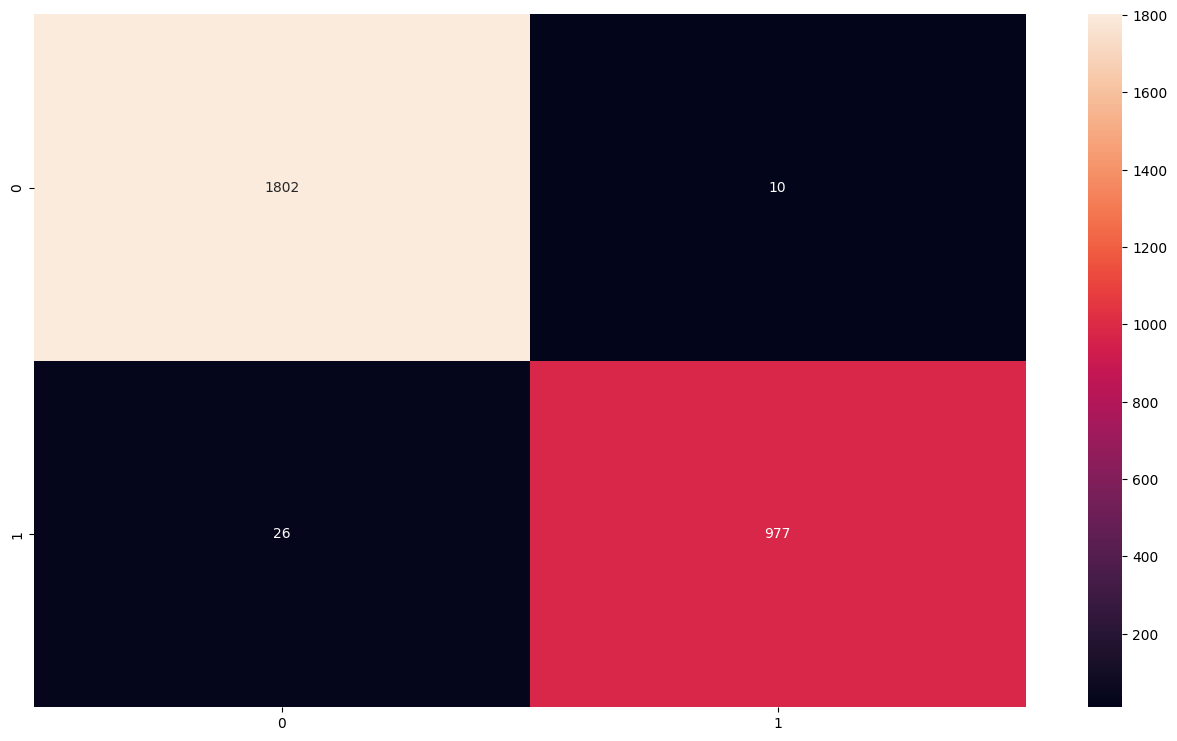

In [986]:
cm = confusion_matrix(Y_test,random_forest_predictions)
sb.heatmap(cm, annot = True, fmt = "g")

In [987]:
f1 = f1_score(Y_test, random_forest_predictions)
recall = recall_score(Y_test, random_forest_predictions)
precision = precision_score(Y_test, random_forest_predictions)
mae = mean_absolute_error(Y_test, random_forest_predictions)
rmse = mean_squared_error(Y_test, random_forest_predictions, squared=False)

In [988]:
print("F1 Score : ", f1)
print("Recall : ", recall)
print("Precision : ", precision)
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", rmse)

F1 Score :  0.9819095477386934
Recall :  0.9740777666999003
Precision :  0.9898682877406282
Mean Absolute Error :  0.012788632326820605
Mean Squared Error :  0.1130868353382506


6. XGBoost

<Axes: >

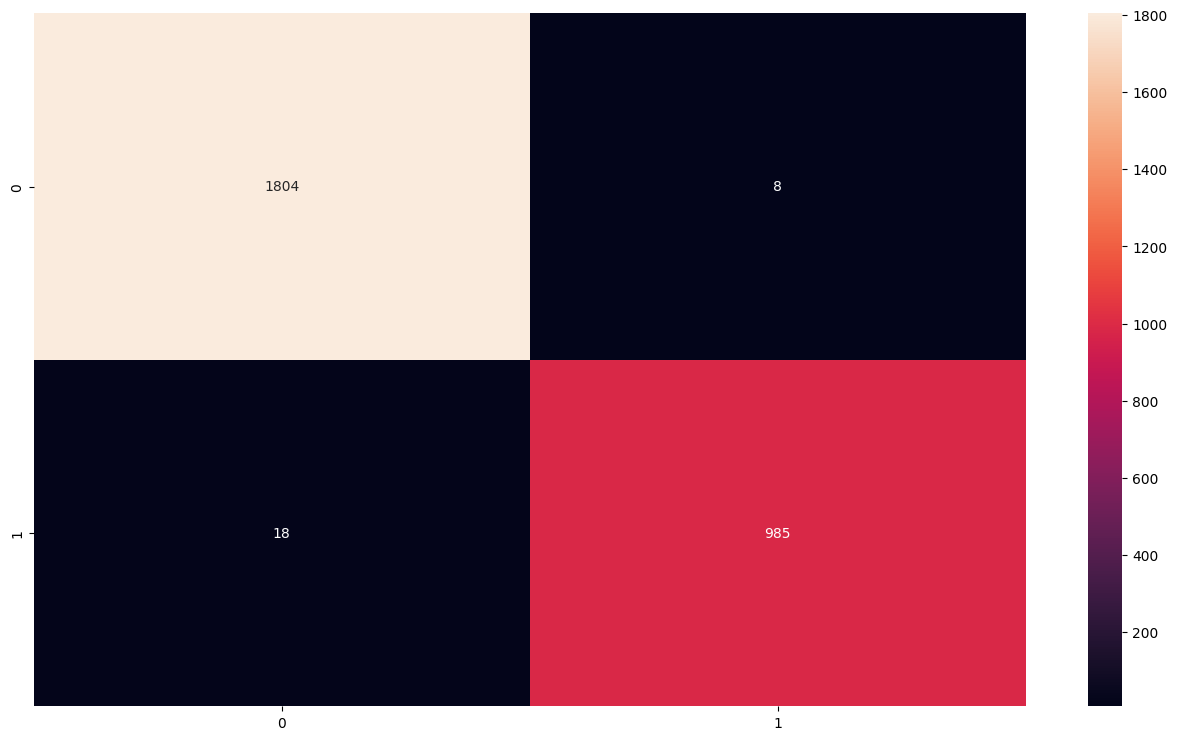

In [989]:
cm = confusion_matrix(Y_test,XGBoost_predictions)
sb.heatmap(cm, annot = True, fmt = "g")

In [990]:
f1 = f1_score(Y_test, XGBoost_predictions)
recall = recall_score(Y_test, XGBoost_predictions)
precision = precision_score(Y_test, XGBoost_predictions)
mae = mean_absolute_error(Y_test, XGBoost_predictions)
rmse = mean_squared_error(Y_test, XGBoost_predictions, squared=False)

In [991]:
print("F1 Score : ", f1)
print("Recall : ", recall)
print("Precision : ", precision)
print("Mean Absolute Error : ", mae)
print("Mean Squared Error : ", rmse)

F1 Score :  0.9869739478957915
Recall :  0.9820538384845464
Precision :  0.9919436052366566
Mean Absolute Error :  0.009236234458259326
Mean Squared Error :  0.09610533002003233
